Algorithm used:
KNN classifier. [Baseline algorithm and does not give much accuracy]
k value after cross validation=1

In [12]:
%pip install scikit-learn pandas matplotlib

     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ----------- --------------------------- 30.7/106.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 16.8 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 24.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 26.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 23.6 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 17.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 16.3 MB/s eta 0:00:01
   --------------------- ------------------ 4.4/8.1 MB 14.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.6/8.1 MB 13.5 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/8.1 MB 12.4 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("cleaned_early_pd_dataset.csv")

X = df.drop(columns=['label', 'patient_id', 'visit_id', 'visit_month'])  # drop ID/time columns
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
print("The number of instances of each type:")
print(f"Training X:{X_train.shape[0]}")
print(f"Testing X:{X_test.shape[0]}")
print(f"Training y:{y_train.shape[0]}")
print(f"Testing y:{y_test.shape[0]}")

The number of instances of each type:
Training X:854
Testing X:214
Training y:854
Testing y:214


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

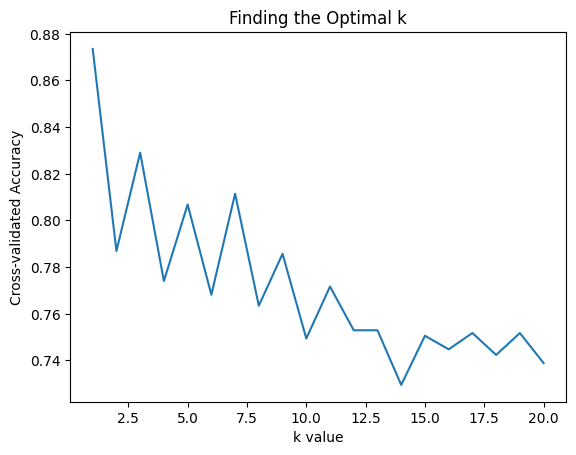

In [15]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Cross-validated Accuracy')
plt.title('Finding the Optimal k')
plt.show()


Peak value is obtained at k=1

In [19]:
# Step 2: Train KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Step 3: Predict and evaluate
y_pred = knn.predict(X_test_scaled)

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Confusion matrix
[[ 59  16]
 [ 14 125]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        75
           1       0.89      0.90      0.89       139

    accuracy                           0.86       214
   macro avg       0.85      0.84      0.85       214
weighted avg       0.86      0.86      0.86       214



Inference: k=1(obtained after cross validation)

Class 0 (non-Parkinson’s cases):
Precision = 0.81 ---> 81% of those predicted as 0 were actually 0.
Recall = 0.79 ---> 90% of actual 0 cases were correctly predicted.
F1 = 0.80 ---> Good balance of precision and recall.

Class 1 (Parkinson’s cases):
Precision = 0.89 ---> 89% of those predicted as 1 were correct.
Recall = 0.90 ---> 90% of actual 1 cases were correctly detected.
F1 = 0.89 ---> Very good!

Accuracy of the knn where k=1 is 86%